# Загрузим необходимые библиотеки




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.style.use('ggplot')
%matplotlib inline

# Загрузим датасет

In [ ]:
df = pd.read_csv('cookie_cats.csv')

In [ ]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
df.shape

(90189, 5)

**Описание колонок:**
- ```userid``` - уникальный номер, идентифицирующий каждого игрока.
- ```version``` - был ли пользователь отнесен к контрольной группе (gate_30 - ворота не 30-м уровне) или к тестовой (gate_40 - ворота на 40-м уровне).
- ```sum_gamerounds``` - число сессий, сыгранных игроком в течение первых 14 дней после установки игры.
- ```retention_1``` - вернулся ли игрок после **первого** дня с момента установки?
- ```retention_7``` - вернулся ли игрок после **седьмого** дня с момента установки?

Когда игрок устанавливает игру, он/она случайным образом относятся либо к группе ```gate_30```, либо к ```gate_40```. Проверим, дествительно их примерно поровну в каждой из групп

In [ ]:
df.groupby(by = 'version', as_index = False)['userid'].count()

,version,userid
0,gate_30,44700
1,gate_40,45489


# Исследовательский анализ данных

Проверим нашу выборку на наличие выбросов и неправильных значений

Выведем основную статистику по датасету

In [ ]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [ ]:
df[df['sum_gamerounds'] > 55]

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False
...,...,...,...,...,...
90153,9995638,gate_30,67,True,False
90160,9996269,gate_30,143,False,False
90163,9996688,gate_30,83,True,True
90171,9997757,gate_30,84,True,False


In [ ]:
df[df['sum_gamerounds'] > 5000]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


Избавимся от найденного выброса

In [ ]:
data = df[df['userid']!=6390605]

In [ ]:
data.describe()

,userid,sum_gamerounds
count,9.018800e+04,90188.000000
mean,4.998397e+06,51.320253
std,2.883298e+06,102.682719
min,1.160000e+02,0.000000
25%,2.512211e+06,5.000000
50%,4.995804e+06,16.000000
75%,7.496461e+06,51.000000
max,9.999861e+06,2961.000000


Ситуация изменилась, статистика стала более реалистичнее. Однако все равно есть значения, которые очень отклоняются от среднего.

In [ ]:
data[data['sum_gamerounds']>2000]

,userid,version,sum_gamerounds,retention_1,retention_7
6536,725080,gate_40,2015,True,True
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
36933,4090246,gate_40,2124,True,True
43671,4832608,gate_30,2438,True,True
46344,5133952,gate_30,2251,True,True
48188,5346171,gate_40,2294,True,True
87007,9640085,gate_30,2156,True,True
88328,9791599,gate_40,2063,True,True


In [ ]:
data[data['sum_gamerounds']>2000].shape

(9, 5)

Построим гистограмму сыгранных раундов

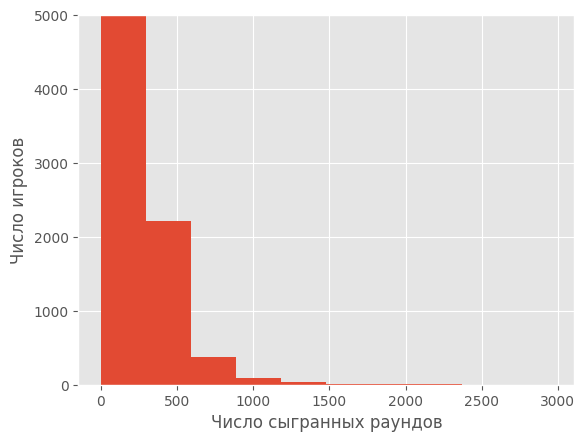

In [ ]:
plt.hist(data['sum_gamerounds'])
plt.xlabel("Число сыгранных раундов")
plt.ylabel("Число игроков")
plt.ylim([0,5000]);

Гистограмма выклядит логично: сначала все игроки играют первые раунды, а затем остаются играть лишь немногие

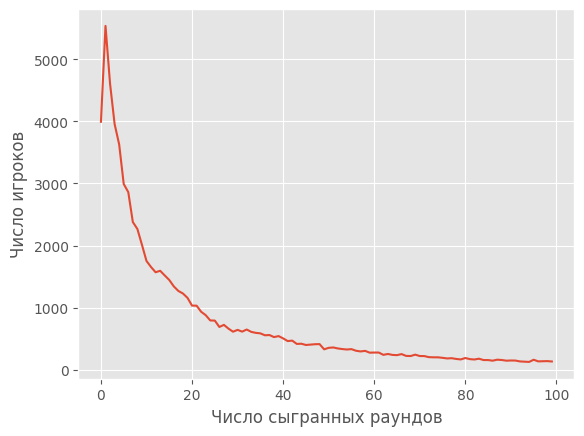

In [ ]:
plt_data = data.groupby(by = 'sum_gamerounds')['userid'].count()

ax = plt_data.head(100).plot()
ax.set_xlabel("Число сыгранных раундов")
ax.set_ylabel("Число игроков");

На графике видим, что некоторые игроки установили игру, но даже ни разу в неё не поиграли (они имеют 0 игр), но некоторые играли более 80 раз в игру, что говорит о том, что она им понравилось.

Наша цель заинтересовать большее количество игроков.

Посмотрим, сколько вернулось после первого дня

In [ ]:
data.groupby(by = 'retention_1', as_index = False)[['userid']].count()

,retention_1,userid
0,False,50035
1,True,40153


Видим, что после первого дня отваливается очень много юзеров

In [ ]:
data.groupby(by = 'retention_7', as_index = False)[['userid']].count()

,retention_7,userid
0,False,73408
1,True,16780


Видим, что на 7 день остается только 18% юзеров от общего числа

Посмотрим, есть ли нулевые значения

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90188 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90188 non-null  int64 
 1   version         90188 non-null  object
 2   sum_gamerounds  90188 non-null  int64 
 3   retention_1     90188 non-null  bool  
 4   retention_7     90188 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.9+ MB


In [ ]:
data.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

Посмотрим на среднее значение пользователей после первого и седьмого дней в зависимости от группы

In [ ]:
df.groupby(by = 'version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

In [ ]:
df.groupby(by = 'version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

# AB тест

 Как и с retention_1, видно, что retention_7 немного ниже, когда ворота находятся на 40-м уровне, чем на 30-м. Также видно, что удержание 7-го дня ниже, чем удержание 1-го дня - спустя неделю меньше людей все ещё заходят в игру.

 Вопрос: значима ли эта разница?

Гипотезы
- H0: При изменении ворот с 40-го на 30-й уровень доля пользователей, играющих в игру не изменится.
- H1: При изменении уровня ворот, доля пользователей с воротами на 30-м уровне будте больше, чем на 40-м.


$$ H_0 : p_{40} = p_{30}$$
$$ H_1: p_{40} < p_{30}$$

Целевая метрика: ```retention_7```

Вспомогательная: ```sum_rounds```, ```retention_1```

MDE = 1%

Lift = 1%

$\alpha$ = 5%

$\beta$ = 20%

Найдем число пользователей $n$, необходимое для нашего теста

In [ ]:
import statsmodels.stats.api as sms

# Задаем параметры для расчета размера выборки
baseline_conversion = 0.18 #конверсия
mde = 0.01
desired_power = 0.8
alpha = 0.05

# Рассчитываем размер выборки
effect_size = sms.proportion_effectsize(baseline_conversion, baseline_conversion + mde)
sample_size = sms.NormalIndPower().solve_power(effect_size=effect_size, power=desired_power, alpha=alpha, ratio=1, alternative='two-sided')

print("Размер выборки:", sample_size)

Размер выборки: 23664.347301915222


$n$ = 23600

Разделим юзеров на группы пополам. Тогда:

- в гурппе A - 11800 пользователей

- в группе B - 11800 пользователей

Рассмотрим метрики
- конверсия до теста - 18 %
- теоритеческая конверсия после теста - 19%


Длительность теста $t$ = 14 д.

Разобьем ГС на контрольную и тестовую выборки

In [ ]:
control = data[data['version'] == 'gate_30']
control = control.sample(n = 11800, replace = False)

In [ ]:
test = data[data['version'] == 'gate_40']
test = test.sample(n = 11800, replace = False)

In [ ]:
control.groupby(by = 'version', as_index = False)['retention_7'].mean()

,version,retention_7
0,gate_30,0.184915


In [ ]:
test.groupby(by = 'version', as_index = False)['retention_7'].mean()

,version,retention_7
0,gate_40,0.182288


Таким образом:
- конверсия на контроле: 19.4661%
- конверия на тесте: 18.2712%

Видим, что конверсия в тесте стала меньше примерно на 1%

Рассмотрим теперь вспомогательные метрики

In [ ]:
control.groupby(by = 'version', as_index = False)[['sum_gamerounds','retention_1']].agg({'sum_gamerounds' : 'mean', 'retention_1':'mean'})

,version,sum_gamerounds,retention_1
0,gate_30,50.653305,0.445508


In [ ]:
test.groupby(by = 'version', as_index = False)[['sum_gamerounds','retention_1']].agg({'sum_gamerounds' : 'mean', 'retention_1':'mean'})

,version,sum_gamerounds,retention_1
0,gate_40,50.950254,0.44


******************** Welch's t-test: ********************
                                                  
Нет статистически значимых различий, p value = 0.16867
                                                  
******************** Student's t-test: ********************
                                                  
Нет статистически значимых различий, p value = 0.16867
                                                  
******************** MDE comparison ********************
                                                  
MDE now: 0.04
MDE default: 0.01
                                                  
MDE estimated is higher MDE predicted
                                                  
******************** Доверительный интервал ********************
                                                  
(-4.3711797466094975, 0.764400085592539)


<ipython-input-93-a0ca608ebd58>:75: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control, kde = True, hist = False,label = 'control')
<ipython-input-93-a0ca608ebd58>:76: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test,kde = True, hist = False, label = 'test')


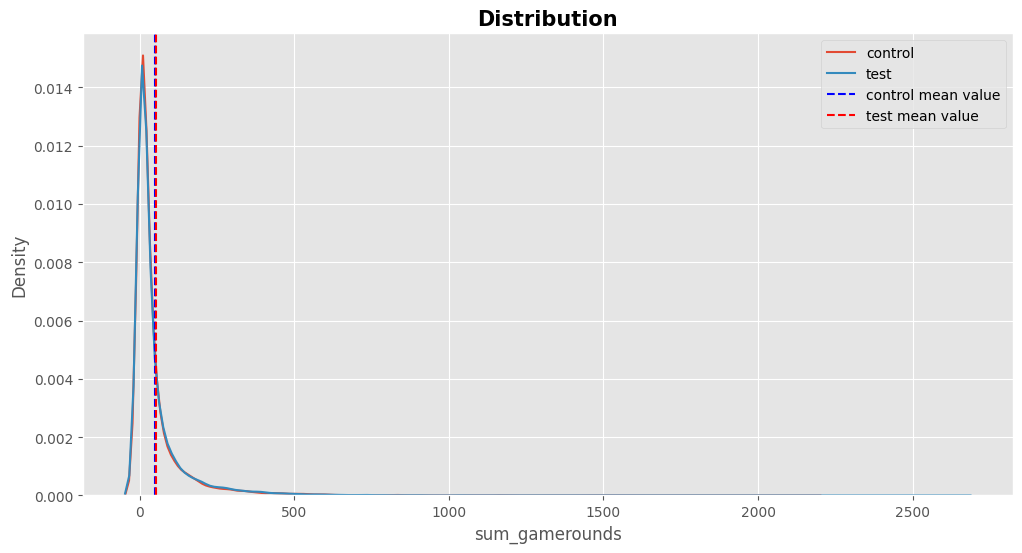

In [ ]:
alpha = 0.05 #уровень стат значимости
mde = 0.01 #Minimal Detectable Effect

control = control['sum_gamerounds']
test = test['sum_gamerounds']


def ttest(control, test, alpha, mde):
  '''
  Параметрический тест - t-test

  Функция принимает следующие параметры:

  control - значения из контрольной группы
  test - значения из тестовой группы
  alpha - уровень статистической значимости
  mde - минимальный эффект, который мы можем обнаружить с определенной мощностью

  На выходе функция показывает результаты теста, а также строит доверительный интервал изменения
  '''
  #mde_est
  mde_est = round((np.mean(test) - np.mean(control)) / np.mean(control),2)
  # т-критерий Уэлча
  welch_t, welch_p = stats.ttest_ind(control, test, equal_var=False)

  # т-критерий Стъюдента
  student_t, student_p = stats.ttest_ind(control, test, equal_var=True)


  #считаем ДИ
  confidence_interval = stats.t.interval(1 - alpha, len(control) + len(test) - 2,
  loc=(np.mean(control) - np.mean(test)),
  scale=np.sqrt((np.var(control) / len(control)) + (np.var(test) / len(test))))



  mean_control = np.mean(control)
  mean_test = np.mean(test)



  print('*' * 20,"Welch's t-test:",'*' * 20)
  print(' ' * 50)
  if welch_p < alpha:
    print(f"Есть статистически значимые различия, p value = {round(welch_p,5)}")
  else:
    print(f'Нет статистически значимых различий, p value = {round(welch_p,5)}')

  print(' ' * 50)
  print('*' * 20, "Student's t-test:", '*' * 20)
  print(' ' * 50)
  if student_p < alpha:
    print(f"Есть статистически значимые различия, p value = {round(student_p,5)}")
  else:
    print(f'Нет статистически значимых различий, p value = {round(student_p,5)}')
  print(' ' * 50)
  print('*' * 20, 'MDE comparison', '*' * 20)
  print(' ' * 50)
  print(f"MDE now: {mde_est}\nMDE default: {mde}")
  print(' ' * 50)
  if mde_est > mde:
    print("MDE estimated is higher MDE predicted")
  else:
    print('MDE estimated is lower than MDE predicted')
  print(' ' * 50)

  print('*' * 20,'Доверительный интервал','*' * 20)
  print(' ' * 50)
  print(confidence_interval)


  #рисуем графики
  plt.figure(figsize = (12,6))
  plt.title('Distribution', size = 15, weight = 'heavy')
  sns.distplot(control, kde = True, hist = False,label = 'control')
  sns.distplot(test,kde = True, hist = False, label = 'test')

  plt.axvline(mean_control, color = 'b', ls = '--', label = 'control mean value')
  plt.axvline(mean_test, color = 'r', ls = '--', label = 'test mean value')

  plt.legend()
  plt.show()


ttest(control, test, alpha, mde)

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05 #уровень значимости 5%

df_agg = data.groupby('version').retention_1.agg(['sum','count','mean'])

n_obs = df_agg['count'].values #размер выборки
m_obs = df_agg['sum'].values   #число успехов
p_obs = df_agg['mean'].values  #доли

z_obs, p_val = proportions_ztest(m_obs, n_obs, value = 0, alternative ='larger')

print(f"Наблюдаемое значение статистики: {z_obs:.3}")
print(f"p_value: {p_val:.3}")

Наблюдаемое значение статистики: 1.79
p_value: 0.037


In [ ]:

alpha = 0.05 #уровень значимости 5%

df_agg = data.groupby('version').retention_7.agg(['sum','count','mean'])

n_obs = df_agg['count'].values #размер выборки
m_obs = df_agg['sum'].values   #число успехов
p_obs = df_agg['mean'].values  #доли

z_obs, p_val = proportions_ztest(m_obs, n_obs, value = 0, alternative ='larger')

print(f"Наблюдаемое значение статистики: {z_obs:.3}")
print(f"p_value: {p_val:.3}")

Наблюдаемое значение статистики: 3.16
p_value: 0.000796


Видим, что и там, и там разница сильно значима. Для 7-дневного удержания происходит мощный обвал

# Выводы

Результаты AB - теста говорят нам о том, что наблюдается значительное превышение retention 7-го дня в группе с воротами на 30-м уровне над группой с воротами на 40-м уровне. Значит, если мы хотим поддерживать удержание клиента на нужном высоком уровне, то не нужно сдвигать ворота с 30-го на 40-й уровень.